<a href="https://colab.research.google.com/github/Mcuong1923/Databt/blob/main/07_Visualization/Chipotle/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [3]:
# Thay pd.read_csv bằng pd.read_table để đọc tệp TSV
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv"
chipo = pd.read_table(url)

# In ra 10 dòng đầu tiên của dữ liệu
print(chipo.head(10))



   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 4. See the first 10 entries

In [4]:
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 5. Create a histogram of the top 5 items bought

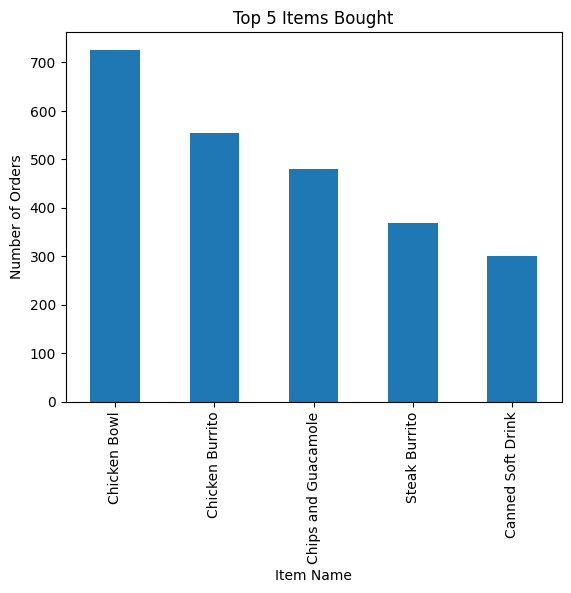

In [5]:
import matplotlib.pyplot as plt

# Group by item name and count how many times each item was bought
top_items = chipo['item_name'].value_counts().head(5)

# Create histogram
top_items.plot(kind='bar')
plt.title('Top 5 Items Bought')
plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

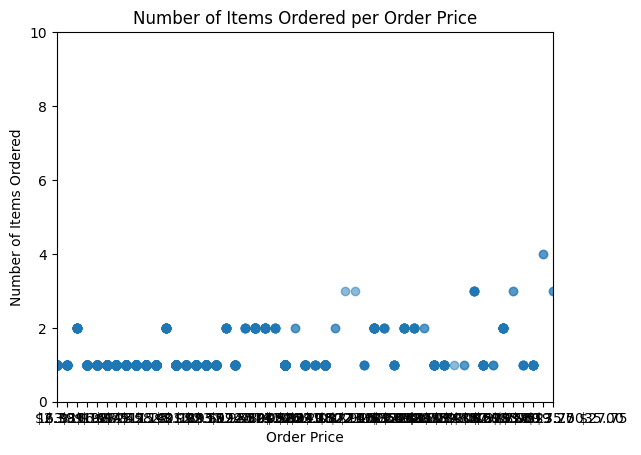

In [8]:
# Calculate total price per order
chipo['order_price'] = chipo['item_price'] * chipo['quantity']

# Create scatterplot with alpha for transparency
plt.scatter(chipo['order_price'], chipo['quantity'], alpha=0.5)
plt.title('Number of Items Ordered per Order Price')
plt.xlabel('Order Price')
plt.ylabel('Number of Items Ordered')

# Optional: Set axis limits to zoom in
plt.xlim(0, 50)  # Adjust the price range if necessary
plt.ylim(0, 10)  # Adjust the number of items range if necessary

plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.

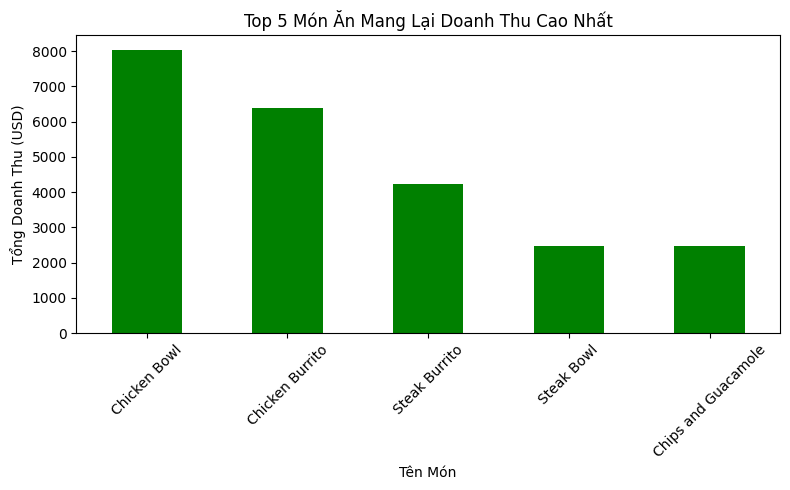

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử DataFrame 'chipo' đã được nạp sẵn
# 1. Chuyển 'item_price' về dạng số (float) nếu chưa làm ở bước trước
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

# 2. Tạo cột doanh thu: quantity * item_price
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

# 3. Gom nhóm theo 'item_name' và tính tổng doanh thu
revenue_by_item = chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False)

# 4. Chọn ra top 5 món có tổng doanh thu cao nhất
top_5_items = revenue_by_item.head(5)

# 5. Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
top_5_items.plot(kind='bar', color='green')
plt.title('Top 5 Món Ăn Mang Lại Doanh Thu Cao Nhất')
plt.xlabel('Tên Món')
plt.ylabel('Tổng Doanh Thu (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
